# Sentiment analysis

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import math

### Importing the file and assigning polarity and subjectivity

In [2]:
github_url = 'https://raw.githubusercontent.com/ignacyklimont/MDA-Project-Obama-Speeches/main/speeches_clean.csv'
df_speeches = pd.read_csv(github_url)
df_speeches.columns = ['Title', 'Date', 'Text']

In [12]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_speeches['Polarity'] = df_speeches['Text'].apply(pol) # Applying polarity analysis
df_speeches['Subjectivity'] = df_speeches['Text'].apply(sub) # Applying subjectivity analysis
df_speeches.head()

,Title,Date,Text,Polarity,Subjectivity
0,First President-Elect Press Conference,07 Nov 2008,irectly audio morning woke sobering news state...,0.093936,0.420103
1,Global Climate Summit Prerecorded Speech,18 Nov 2008,g world urgent climate change science beyond d...,0.190776,0.453152
2,Economic Team Announcement Speech,24 Nov 2008,ed text version directly audio news past week ...,0.147082,0.342789
3,Economic Recovery Advisory Board Announcement,26 Nov 2008,crisis historic moment nation history old way...,0.176241,0.356387
4,Security Team Announcement Speech,01 Dec 2008,morning everybody hope wonderful thanksgiving ...,0.146528,0.435752


### Overview of sentiment of speeches by Barack Obama from 2008 to 2017

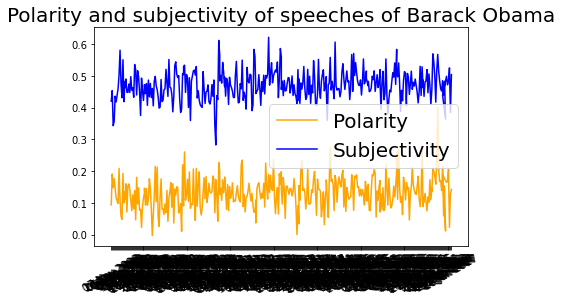

In [4]:
plt.plot(df_speeches['Date'], df_speeches['Polarity'], 'orange', label = 'Polarity')
plt.plot(df_speeches['Date'], df_speeches['Subjectivity'], 'blue', label = 'Subjectivity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.title('Polarity and subjectivity of speeches of Barack Obama', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.show()

### TOP 10 most positive speeches

In [5]:
df_speeches.nlargest(n=10, columns=['Polarity']) # TOP 10 most positive speeches

,Title,Date,Text,Polarity,Subjectivity
351,First Meeting with President-Elect Donald Trump,10 Nov 2016,ort audio element click authenticity certified...,0.402135,0.567049
233,Ebola Response Update Speech,28 Oct 2014,ticity certified text version directly audio g...,0.275446,0.557706
333,Presidential Endorsement of Hillary Clinton,9 Jun 2016,io element click authenticity certified text v...,0.271111,0.528000
308,Address on the Passing of USSC Justice Antonin...,13 Feb 2016,ent click authenticity certified text version ...,0.268157,0.540059
306,Honoring Golden State Warriors 2015 NBA Champs,04 Feb 2016,lcome white house everybody give champion gold...,0.261031,0.518756
78,Speech Nominating Elena Kagan for USSC Justice,10 May 2010,ort audio element click authenticity certified...,0.260201,0.533155
172,BRAIN Initiative Announcement,02 Apr 2013,ticity certified text version directly audio f...,0.235881,0.500264
139,Iraq War Veterans and Families Gala Toast,29 Feb 2012,outstanding extraordinary leadership helping g...,0.234564,0.549103
350,Remarks on the U.S. Presidential Election Outcome,09 Nov 2016,noon everybody yesterday shot video may seen s...,0.233449,0.516810
203,Veterans Day Address,11 Nov 2013,irectly audio thank secretary lifetime service...,0.232903,0.457915


### TOP 10 most negative speeches

In [6]:
df_speeches.nsmallest(n=10, columns=['Polarity']) # TOP 10 most subjective speeches

,Title,Date,Text,Polarity,Subjectivity
44,9/11 Pentagon Memorial Speech,11 Sep 2009,taken us turning diminish pain loss day passag...,-0.003118,0.459936
197,Speech to the Nation on Syria,10 Sep 2013,directly audio fellow tonight want talk go pa...,0.000030,0.412900
74,Eulogy for Upper Big Branch Miners,25 Apr 2010,rowser support audio element click authenticit...,0.010417,0.395238
359,Address at Pearl Harbor,27 Dec 2016,nt click authenticity certified text version d...,0.011517,0.363709
32,Speech at Buchenwald Concentration Camp,04 Jun 2009,shed tour want thank gave outstanding account ...,0.022445,0.492506
364,Final Presidential Weekly Address,14 Jan 2017,een eye eye rarely agreed people living factor...,0.023106,0.524621
51,Nobel Prize for Peace Speech and Lecture,10 Dec 2009,orld receive honor deep gratitude great humili...,0.025819,0.398301
226,On Air Strikes and Humanitarian Effort in Iraq,07 Aug 2014,aid august state dining room white house c bro...,0.031282,0.452639
199,United Nations 68th Session General Assembly S...,24 Sep 2013,authenticity certified text version directly ...,0.034129,0.422183
66,Health Care Speech at George Mason University,19 Mar 2010,thank thank yes yes yes yes thank everybody it...,0.036600,0.435326


### Splitting seven chosen texts into parts to evaluate sentiment distribution across each part of the speech

In [7]:
 # The function takes in a string of text and splits into n (n = 10) equal parts
 def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
speech_split = []
for i in [0, 52, 69, 118, 135, 159, 163]:
    speech_split.append(split_text(df_speeches.iloc[i, 2])) # 0: First Victory Speech, 52: Nobel Prize,
                # 69: Health Care Law, 118: Death of Bin-Laden, 135: End of Iraq War, 159: Second Victory Speech,
                #163: Sandy Hook School Shooting
speech_amount = len(speech_split)

In [9]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)

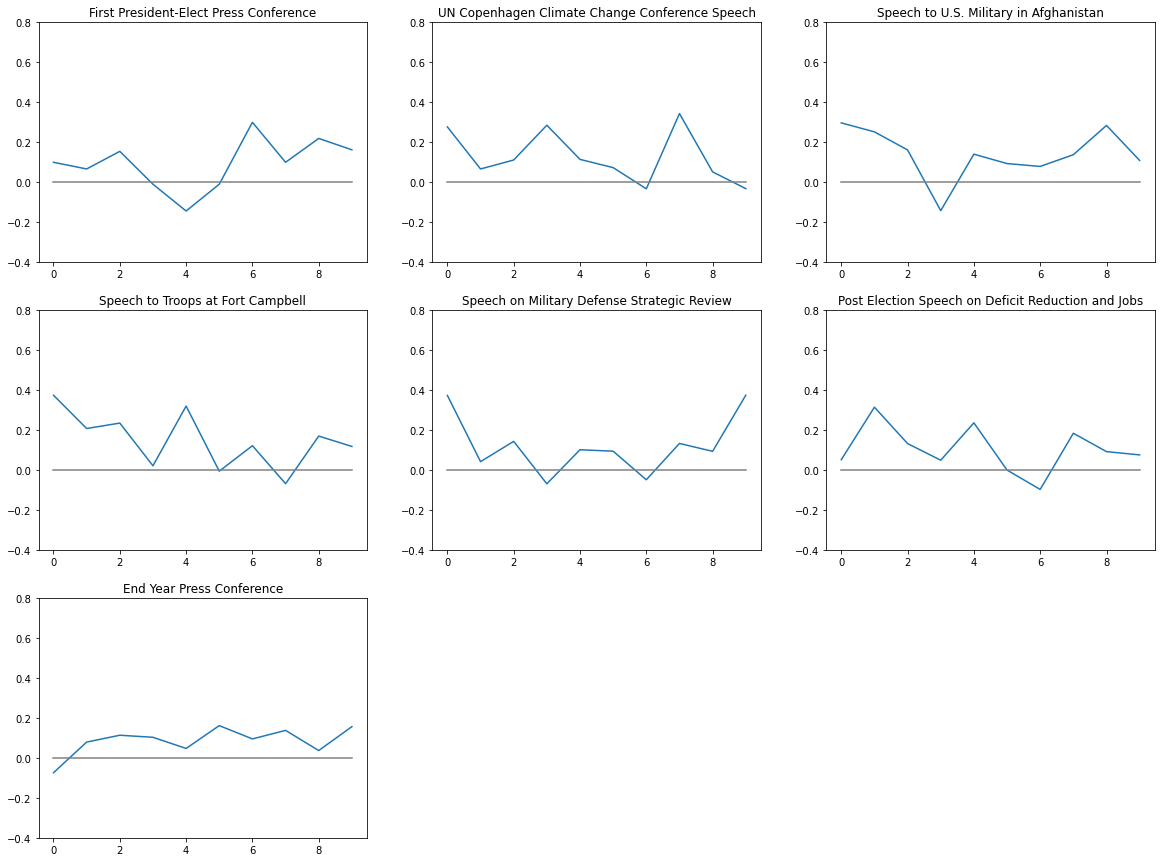

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
n=0
nw = [0, 52, 69, 118, 135, 159, 163]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df_speeches.iloc[nw[n-1],0])
    plt.ylim(ymin=-.4, ymax=.8)
plt.show()